# Homework 1 (HW1)

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways; 
- Create meaningful visualizations to analyze the data;

---

## Important Dates

- Homework release: Fri 14 Oct 2022
- **Homework due**: Sat 29 Oct 2022, 23:59
- Grade release: Mon 07 Nov 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

In this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece. The homework contains four tasks: in task 1, we will process the data; in task 2, we will extract meaningful signals from the data; in task 3, we will test whether the language of headlines impacts their success; and in task 4, we will explore the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)). 
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails. 
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist). 
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece. 
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and ledes for the same news piece. 
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version. 
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece. 
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news. 
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](example.png)

 ### **Where does this data come from?** 
 
 From a paper [1].

[1] Matias, J.N., Munger, K., Le Quere, M.A. et al. The Upworthy Research Archive, a time series of 32,487 experiments in U.S. media. Sci Data 8, 195 (2021). https://doi.org/10.1038/s41597-021-00934-7

### **Where can I find this data?**  

You can find it in the `/data/` folder.

### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the lede, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 1) how many users were shown each package; and 2) how many individuals clicked each package.

### **Data description**

| Column name          | Description                                                                                                                                                                                       |   |   |   |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| created_at           | Time the package was created (timezone unknown)                                                                                                                                                   |   |   |   |
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling                                                                                       |   |   |   |
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID                                                                                                                     |   |   |   |
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id    |   |   |   |
| headline             | The headline being tested                                                                                                                                                                         |   |   |   |
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id                                                                                          |   |   |   |
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions                                   |   |   |   |
| excerpt              | Article excerpt                                                                                                                                                                                   |   |   |   |
| lede                 | The opening sentence or paragraph of the story                                                                                                                                                    |   |   |   |
| slug                 | Internal name for the web address                                                                                                                                                                 |   |   |   |
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website                                                   |   |   |   |
| square               | When used, part of the same social media sharing suggestion as the share text                                                                                                                     |   |   |   |
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages |   |   |   |
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose                                                                                                            |   |   |   |
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test                                                                                                          |   |   |   |
| updated_at           | The last time the package was updated in the Upworthy system                                                                                                                                      |   |   |   |


## Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. 
Last, plot the distribution of packages per experiment with a visualization of your choice.

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. 
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image). 
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. 
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. 
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.6 **Discuss:** Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first columns of your newly created dataframe, as well as its length.
-  the columns where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`). 

1.9 **Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# for simple functions like mean(), std()
import numpy as np

# for stats
from scipy import stats

In [13]:
DATA_FOLDER = "./data/"

In [14]:
# 1.1
data = pd.read_csv(DATA_FOLDER + "upworthy.csv.gz")
data.head()

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446


4822 experiments were conducted in this dataset.
About 4.273 packages were considered per experiment on average


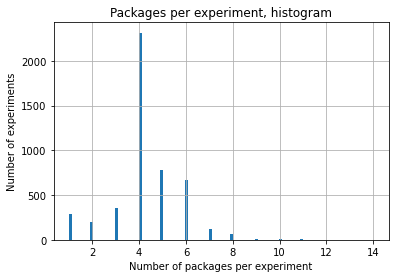

In [15]:
# 1.2
experiments = data.groupby("clickability_test_id")
packages_per_exp = experiments["created_at"].count()

print(f"{len(experiments)} experiments were conducted in this dataset.")
print(f"About {round(packages_per_exp.mean(), 3)} packages were considered per experiment on average")

packages_per_exp.hist(bins=100)
plt.xlabel('Number of packages per experiment')
plt.ylabel('Number of experiments')
plt.title('Packages per experiment, histogram')
plt.show()

In [16]:
# 1.3
data["ctr"] = data["clicks"] / data["impressions"]
assert data.iloc[0]["ctr"] == data.iloc[0]["clicks"] / data.iloc[0]["impressions"]

In [17]:
data

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446,0.049148
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.025525
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.034227
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.028994
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.021645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20598,2014-11-20 01:22:43.054,2016-04-02 16:25:53.914,546d373426714cde76000018,Things that matter. Pass 'em on.,Newsflash: Black People Travel Too. Here's Why.,<p>Travel isn't just a luxury or indulgence an...,newsflash-black-people-travel-too-heres-why-ew...,546d398a9ad54eec8d00000f,3575,15,0.0,False,False,NaN,NaN,201446,0.004196
20599,2014-11-20 01:21:49.197,2016-04-02 16:25:53.916,546d373426714cde76000018,Things that matter. Pass 'em on.,5 Reasons You May Need To Plan A Vacation - Ri...,<p>Travel isn't just a luxury or indulgence an...,5-reasons-you-may-need-to-plan-a-vacation-righ...,546d398a9ad54eec8d00000f,3724,18,0.0,True,False,NaN,NaN,201446,0.004834
20600,2014-11-20 01:23:31.203,2016-04-02 16:31:40.651,546d373426714cde76000018,Things that matter. Pass 'em on.,The Next Time You Encounter A Small Minded Big...,<p>Travel isn't just a luxury or indulgence an...,the-next-time-you-encounter-a-small-minded-big...,546d398a9ad54eec8d00000f,3728,23,0.0,False,False,NaN,NaN,201446,0.006170
20601,2014-11-20 01:24:23.415,2016-04-02 16:31:50.079,546d373426714cde76000018,Things that matter. Pass 'em on.,I've Never Wanted To Buy A Plane Ticket More T...,<p>Travel isn't just a luxury or indulgence an...,ive-never-wanted-to-buy-a-plane-ticket-more-th...,546d398a9ad54eec8d00000f,3581,21,0.0,False,False,NaN,NaN,201446,0.005864


In [18]:
# 1.4
multiple_headlines = data[~data.duplicated(["clickability_test_id", "headline"], keep=False)]
print(f"There are {len(multiple_headlines)} experiments with varying headlines.")
print(f"{len(data) - len(multiple_headlines)} were discarded in the filtering process.")

There are 10767 experiments with varying headlines.
9836 were discarded in the filtering process.


In [19]:
# 1.5
multiple_images = data[~data.duplicated(["clickability_test_id", "eyecatcher_id"], keep=False)]
print(f"There are {len(multiple_images)} experiments with varying images.")
print(f"{len(data) - len(multiple_images)} were discarded in the filtering process.")

There are 7382 experiments with varying images.
13221 were discarded in the filtering process.


### 1.6
More than half of the experiments vary their headlines. A lot less vary their images instead.  
Upworthy probably wanted more to see the effect of headlines rather than images.

In [20]:
# 1.7
pairs = data.merge(data, on=["clickability_test_id", "eyecatcher_id", "lede", "excerpt"], suffixes=('1', '2')).filter(["clickability_test_id", "headline1", "headline2", "ctr1", "ctr2", "created_at1", "created_at2"])#.drop(["created_at1", "created_at2", "updated_at1", "updated_at2", "excerpt", "lede", "slug1", "slug2", "eyecatcher_id", "square1", "square2", "significance1", "significance2"], axis=1)
pairs = pairs[pairs["ctr1"] > pairs["ctr2"]]
pairs = pairs.drop("created_at2", axis=1)
pairs = pairs.rename(columns={"created_at1": "date_created"})

print(f"Size: {len(pairs)} elements.")
pairs.head()

Size: 17727 elements.


,clickability_test_id,headline1,headline2,ctr1,ctr2,date_created
12,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0.011101,0.005868,2014-11-20 14:57:52.478
14,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0.011101,0.009726,2014-11-20 14:57:52.478
16,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0.012689,0.011101,2014-11-20 14:54:18.78
18,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,He Sat Them Down And Told Them About An Immine...,0.012689,0.005868,2014-11-20 14:54:18.78
20,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,"They May Not Be The Most Handsome Dudes, But T...",0.012689,0.009726,2014-11-20 14:54:18.78


In [21]:
# 1.8
diff_mean = round((pairs["ctr1"] - pairs["ctr2"]).mean(), 5)
ctr2_mean = round(pairs["ctr2"].mean(), 5)
print("Average difference between the most clicked-through and the least clicked-through headline:", diff_mean)
print("Average clickthrough rate for the least clicked through headline:", ctr2_mean)
print("This corresponds to an increase of {:.3%}.".format(diff_mean/ctr2_mean))

Average difference between the most clicked-through and the least clicked-through headline: 0.00412
Average clickthrough rate for the least clicked through headline: 0.01069
This corresponds to an increase of 38.541%.


### 1.9
An increase of more than 38% is in my opinion rather high. It is clear that choosing headlines wisely is important as the number of clicks can significantly increase.

## Task 2: Extracting signals from the data

Your second task is to extract meaningful signals from the data. 
We start this task from the dataset obtained in **T1.7**. 
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline. 
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser." 
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)
 
2.1 Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

2.3 One easy way to classify sentiment is simply to match negative or positive words. 
Use the linked lists of words ([positive][1], [negative][2]) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.
    
[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

--- 

**Comments**

- For **T2.3**, beware of encodings!

In [22]:
# 2.1 

#Function to count number of word in string (provided code)
def count_words_simple(x):
    return len(x.split(" "))
#str_test = "How many words are here?"
#print(str_test, count_words_simple(str_test))

#Applying the function to the column headline1 (resp. 2) to create the columns numwords1 (resp.2)
pairs['numwords1']=pairs['headline1'].apply(lambda x: count_words_simple(x))
pairs['numwords2']=pairs['headline2'].apply(lambda x: count_words_simple(x))
display(pairs.head())

,clickability_test_id,headline1,headline2,ctr1,ctr2,date_created,numwords1,numwords2
12,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0.011101,0.005868,2014-11-20 14:57:52.478,15,19
14,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0.011101,0.009726,2014-11-20 14:57:52.478,15,16
16,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0.012689,0.011101,2014-11-20 14:54:18.78,14,15
18,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,He Sat Them Down And Told Them About An Immine...,0.012689,0.005868,2014-11-20 14:54:18.78,14,19
20,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,"They May Not Be The Most Handsome Dudes, But T...",0.012689,0.009726,2014-11-20 14:54:18.78,14,16


In [23]:
# 2.2 

#Defining the dictionary of pronouns (provided code) 

feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])


def remove_punctuation(sentence):
    list_punctuation=['.',',','?','!']
    for punc in list_punctuation:
        sentence=sentence.replace(punc,"")
    return sentence
    
def occurence(sentence,list_words,print_word=False):
    ''' Input: 
            sentence: a string 
            list_words: a list of string
            print_word: a boolean False by default, if true print all the words 
                        in sentence that where flagged in list_words
        Output: Binary variable: 1 if sentence contains one element of 
                list_words, 0 else.
    '''
    flag=False
    
    #removing punctuation
    sentence=remove_punctuation(sentence)
    
    #check for each words in sentence if it is contained in list_words
    for words in sentence.split(" "):
        if words.lower() in list_words:
            if print_word:
                print(words.lower())
            flag=True
    
    if flag:
        return 1
    else: 
        return 0
    

#Looping through the keys
for person in list(feature_wordsets.keys()):
    #Looping for i=1 and i=2
    for i in range(1,3):
        pairs[person+str(i)]=pairs['headline'+str(i)].apply(lambda x: occurence(x,feature_wordsets[person]))
display(pairs.head())

,clickability_test_id,headline1,headline2,ctr1,ctr2,date_created,numwords1,numwords2,first_person_singular1,first_person_singular2,first_person_plural1,first_person_plural2,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2
12,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0.011101,0.005868,2014-11-20 14:57:52.478,15,19,0,0,0,0,0,0,0,1,1,1
14,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0.011101,0.009726,2014-11-20 14:57:52.478,15,16,0,0,0,0,0,0,0,0,1,1
16,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0.012689,0.011101,2014-11-20 14:54:18.78,14,15,0,0,0,0,0,0,0,0,0,1
18,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,He Sat Them Down And Told Them About An Immine...,0.012689,0.005868,2014-11-20 14:54:18.78,14,19,0,0,0,0,0,0,0,1,0,1
20,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,"They May Not Be The Most Handsome Dudes, But T...",0.012689,0.009726,2014-11-20 14:54:18.78,14,16,0,0,0,0,0,0,0,0,0,1


In [24]:
#some random test, not to be included in final submission
sentence=pairs.iloc[pairs.index[3]]['headline1']
sentence='I am a naughty boy, are They?'
print(sentence)
for person in list(feature_wordsets.keys()):
    print(person,occurence(sentence,feature_wordsets[person]))

I am a naughty boy, are They?
first_person_singular 1
first_person_plural 0
second_person 0
third_person_singular 0
third_person_plural 1


In [25]:
#2.3

#Downloading positive words from https://ptrckprry.com/course/ssd/data/positive-words.txt and storing them in a dataframe
df_positive=pd.read_csv('https://ptrckprry.com/course/ssd/data/positive-words.txt',sep=" ",skiprows=32)
df_positive=df_positive.rename(columns={df_positive.columns[0]:'positive_words'})
#display(df_positive.head())

#Downloading negative words from https://ptrckprry.com/course/ssd/data/negative-words.txt and storing them in a dataframe
df_negative=pd.read_csv('https://ptrckprry.com/course/ssd/data/negative-words.txt',sep=" ",encoding="ISO-8859-1",skiprows=32)
df_negative=df_negative.rename(columns={df_negative.columns[0]:'negative_words'})
#display(df_negative.head())

#Creating a dictionnary as in 2.2
sentiment_wordsets=dict({'positive':df_positive['positive_words'].to_list(),
                        'negative':df_negative['negative_words'].to_list()})

#Looping through the keys
for sentiment in list(sentiment_wordsets.keys()):
    #Looping for i=1 and i=2
    for i in range(1,3):
        pairs[sentiment+str(i)]=pairs['headline'+str(i)].apply(lambda x: occurence(x,sentiment_wordsets[sentiment]))
display(pairs.head())

,clickability_test_id,headline1,headline2,ctr1,ctr2,date_created,numwords1,numwords2,first_person_singular1,first_person_singular2,...,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2,positive1,positive2,negative1,negative2
12,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0.011101,0.005868,2014-11-20 14:57:52.478,15,19,0,0,...,0,0,0,1,1,1,0,0,0,1
14,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0.011101,0.009726,2014-11-20 14:57:52.478,15,16,0,0,...,0,0,0,0,1,1,0,1,0,0
16,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0.012689,0.011101,2014-11-20 14:54:18.78,14,15,0,0,...,0,0,0,0,0,1,0,0,0,0
18,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,He Sat Them Down And Told Them About An Immine...,0.012689,0.005868,2014-11-20 14:54:18.78,14,19,0,0,...,0,0,0,1,0,1,0,0,0,1
20,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,"They May Not Be The Most Handsome Dudes, But T...",0.012689,0.009726,2014-11-20 14:54:18.78,14,16,0,0,...,0,0,0,0,0,1,0,1,0,0


In [26]:
sentence='The Selfies Were Already Bad Enough, But Then There Was Everything Else. This Woman May Have Issues.'
occurence(sentence,sentiment_wordsets['positive'],print_word=True)

enough


1

In [27]:
[x for x in pairs[pairs['positive1']==1]['headline1']]

['The 3 Of Them Needed To See It In Person, And The Fact That It Was Beautiful Made It Even Worse',
 'The 3 Of Them Needed To See It In Person, And The Fact That It Was Beautiful Made It Even Worse',
 'The 3 Of Them Needed To See It In Person, And The Fact That It Was Beautiful Made It Even Worse',
 'The 3 Of Them Needed To See It In Person, And The Fact That It Was Beautiful Made It Even Worse',
 'The 3 Of Them Needed To See It In Person, And The Fact That It Was Beautiful Made It Even Worse',
 "They May Not Be The Most Handsome Dudes, But They're Passionate. And They Have A Mission.",
 'The Selfies Were Already Bad Enough, But Then There Was Everything Else. This Woman May Have Issues.',
 'The Selfies Were Already Bad Enough, But Then There Was Everything Else. This Woman May Have Issues.',
 'Sigh... I Wanted To Like This Woman, But The Selfies Were Too Much. Also, Everything Else About Her.',
 'Colbert Asked Eva Longoria If She Produced A Tomato, But What She Really Produced Is So M

## Task 3: Estimating the effect of language on headline success

Your third task revolves around the question *how does language impact headlines' success?*

3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

3.2 **Discuss:** Are longer headlines more successful? Justify.

3.3 The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$
    
3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.
    
3.7 **Discuss:** When are paired t-tests helpful? Justify.

3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

3.9 **Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.
    
---
**Comments:**

- Paired t-test formula: $t = \frac{\overline{x}_{\mathrm{diff}}}{s_{\mathrm{diff}} / \sqrt n }$ where:
    - $\overline{x}_{\mathrm{diff}}$ is the sample difference between the means of the matched sample; and
    - $s_{\mathrm{diff}}$ is the sample variance of the matched sample; and
    - $n$ is the number of matched samples.
    
- Independent samples t-test formula: $t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$ where:
    - $\overline{x}_{\mathrm{1}}$ is the sample mean of the first group; and
    - $s_{\mathrm{1}}$ is the sample variance of the first group; and
    - $n_1$ is the number of samples in the first group;
    
     
- t-tests are valid for samples of non-normal distribution for large enough samples (a rule of thumb used is: n$\geq$30)!

In [28]:
# 3.1

statistic_ind, p_val_ind = stats.ttest_ind(pairs['numwords1'], pairs['numwords2'])
statistic_pair, p_val_pair = stats.ttest_rel(pairs['numwords1'], pairs['numwords2'])
print(f'The p-values are {p_val_ind:.2e} for the independant sample t-test and {p_val_pair:.2e} for the paired t-test.')

mean_diff = np.mean(pairs['numwords1'] - pairs['numwords2'])
print(f'The difference in mean word count in winner versus loser headlines is {mean_diff}.')

The p-values are 2.44e-17 for the independant sample t-test and 2.12e-24 for the paired t-test.
The difference in mean word count in winner versus loser headlines is 0.27765555367518474.


### 3.2
Using a base alpha level of $\alpha$ = 0.5, and using the Bonferroni correction to get $\alpha_c$ = $\alpha$/2 = 0.25 as we are using 2 tests (independant, paired), we can say that there is strong statistical evidence that the means of the number of words in the winning versus losing headlines are different (as both p-values are under $\alpha_c$), but we do not know which is bigger.  

The calculated mean difference suggests that longer headlines are more successful on average, but we are not sure of this and testing this hypothesis requires another one-sided test.

In [29]:
#3.3

X = np.random.uniform(0, 1, 30)
Y = np.random.uniform(0, 1, 30)
Z = X/2 + Y/2 + 0.1
K = Y + 0.1

### 3.4
Expected values and variance of the random variables are :
- E[X] = $\frac{1}{2}$, Var(X) = $\frac{1}{12}$
- E[Y] = $\frac{1}{2}$, Var(Y) = $\frac{1}{12}$
- E[Z] = $\frac{3}{5}$, Var(Z) = $\frac{1}{24}$
- E[K] = $\frac{3}{5}$, Var(K) = $\frac{1}{12}$

In [30]:
#3.5

pvals = []
for i in range(10000) :
    X = np.random.uniform(0, 1, 30)
    Y = np.random.uniform(0, 1, 30)
    Z = X/2 + Y/2 + 0.1
    K = Y + 0.1
    statistic_ind_xz, p_val_ind_xz = stats.ttest_ind(X, Z)
    statistic_pair_xz, p_val_pair_xz = stats.ttest_rel(X, Z)
    statistic_ind_xk, p_val_ind_xk = stats.ttest_ind(X, K)
    statistic_pair_xk, p_val_pair_xk = stats.ttest_rel(X, K)
    pvals.append((p_val_ind_xz, p_val_pair_xz, p_val_ind_xk, p_val_pair_xk))
pvals = np.array(pvals)

In [31]:
#3.6

stat_power_indxz = len(pvals[:, 0][pvals[:, 0] <= 0.5]) / len(pvals)
stat_power_pairxz = len(pvals[:, 1][pvals[:, 1] <= 0.5]) / len(pvals)
stat_power_indxk = len(pvals[:, 2][pvals[:, 2] <= 0.5]) / len(pvals)
stat_power_pairxk = len(pvals[:, 3][pvals[:, 3] <= 0.5]) / len(pvals)
print('Statistical power of ...')
print('- Independent sample t-test comparing X and Z is', stat_power_indxz)
print('- Paired t-test comparing X and Z is', stat_power_pairxz)
print('- Independent sample t-test comparing X and K is', stat_power_indxk)
print('- Paired t-test comparing X and K is', stat_power_pairxk)

Statistical power of ...
- Independent sample t-test comparing X and Z is 0.9363
- Paired t-test comparing X and Z is 0.979
- Independent sample t-test comparing X and K is 0.7639
- Paired t-test comparing X and K is 0.7613


### 3.7
Paired t-tests seem to be most useful when the tested random variables have different variances, as shown by the better statistical power of the paired test comparing X and Z (with different variances) as compared to that of the paired test comparing X and K (with same variances).

In [32]:
#3.8

def bootstrapping(data, ntimes, gamma, ratio = False, difference = False) :
    ''' Inputs: 
            data: (2D numpy array) data to compute CI on
            ntimes: (int) the number of times to resample
            gamma: (float, in 0-1) the wanted confidence percentage of the CI
            ratio: (boolean) True if the wanted statistic is the mean ratio of the first column divided by that of the
                   second, False if it isn't
            difference: (boolean) True if the wanted statistic is the mean difference between first and second column, 
                        False if it isn't
        Outputs: 
            interval: (list) gamma% confidence interval of the wanted statistic and average of statistic
            mean: (float) mean of the bootstrap distribution
            std: (float) standard deviation of the bootstrap distribution
    '''
    if((ratio and difference) or (not ratio and not difference)) :
        raise Exception('We need to compute exactly one of the statistics; no more, no less !')
    else :
        data_ci = []
        if(ratio) :
            data_ci = data[0] / data[1]
        if(difference) :
            data_ci = data[0] - data[1]
        means = []
        for i in range(ntimes) :
            indices = np.random.randint(0, len(data_ci), len(data_ci))
            sample = [data_ci[j] for j in indices]
            means.append(np.mean(sample))
        interval = [np.percentile(means, (1-gamma)*100/2), np.percentile(means, (1-(1-gamma)/2)*100)]
        mean = np.mean(means)
        std = np.std(means)
        return interval, mean, std

In [33]:
# Mean word ratio between winner and loser headlines
# Dans des cellules différentes parce que ca prend pas mal de temps a run pour un ntimes grand
# J'ai utilisé arbitrairement 1000 runs de bootstrap pour pas que ca run trop longtemps, je sais pas si normalement il faut en
# faire autant que la taille du data qu'on considère ou pas
word_ratio_ci, mean_ratio, _ = bootstrapping(np.array([pairs['numwords1'], pairs['numwords2']]), 1000, 0.95, ratio = True)

In [34]:
# Difference in usage of positive words
positive_diff_ci, mean_pos, _ = bootstrapping(np.array([pairs['positive1'], pairs['positive2']]), 1000, 0.95, difference = True)

In [35]:
# Difference in usage of negative words
negative_diff_ci, mean_neg, _ = bootstrapping(np.array([pairs['negative1'], pairs['negative2']]), 1000, 0.95, difference = True)

In [36]:
# Difference for each type of pronoun
pronoun_diff_cis = []
pronoun_diff_means = []
pronoun_types = list(feature_wordsets.keys())
for pronoun_type in pronoun_types :
    col1 = pronoun_type + str(1)
    col2 = pronoun_type + str(2)
    curr_pronoun_diff_ci, mean_curr_pronoun, _ = bootstrapping(np.array([pairs[col1], pairs[col2]]), 1000, 0.95, difference = True)
    pronoun_diff_cis.append(curr_pronoun_diff_ci)
    pronoun_diff_means.append(mean_curr_pronoun)

In [37]:
print('The averages and confidence intervals are :')
print('- Word ratio :', round(mean_ratio,3), ',', [round(num, 3) for num in word_ratio_ci])
print('- Difference in positive word usage :', round(mean_pos,3), ',', [round(num, 3) for num in positive_diff_ci])
print('- Difference in negative word usage :', round(mean_neg,3), ',', [round(num, 3) for num in negative_diff_ci])
for i in range(len(pronoun_types)) :
    print('- Difference in', pronoun_types[i].replace('_', ' '), 'pronoun usage :', round(pronoun_diff_means[i],3), ',', [round(num, 3) for num in pronoun_diff_cis[i]])

The averages and confidence intervals are :
- Word ratio : 1.062 , [1.058, 1.067]
- Difference in positive word usage : -0.003 , [-0.012, 0.006]
- Difference in negative word usage : 0.019 , [0.01, 0.028]
- Difference in first person singular pronoun usage : 0.016 , [0.01, 0.022]
- Difference in first person plural pronoun usage : -0.009 , [-0.014, -0.003]
- Difference in second person pronoun usage : 0.006 , [-0.001, 0.013]
- Difference in third person singular pronoun usage : 0.034 , [0.025, 0.042]
- Difference in third person plural pronoun usage : 0.002 , [-0.005, 0.007]


### 3.9
From the results obtained above, we can say that :
- We are 95% confident that headlines containing more words are more successful as the CI's bounds are above 1
- We are 95% confident that headlines using negative words are more successful than those that don't as the CI's bounds are strictly positive
- We are 95% confident that headlines using first person singular pronouns are more successful than those that don't as the CI's bounds are strictly positive
- We are 95% confident that headlines that don't use first person plural pronouns are more successful than those that do as the CI's bounds are strictly negative
- We are 95% confident that headlines using third person singular pronouns are more successful that those that don't as the CI's bounds are strictly positive  

We cannot say anything about the other categories, as the CI contains the value 0.  

Furthermore, the above-stated facts are true only when separated and independently tested from one another. Saying that, for example, the most successful headlines "are longer **and** use negative words **and** use first person singular pronouns **and** don't use first person plural pronouns **and** use third person singular pronouns" would require further testing or some kind of correction.

## Task 4: Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.

4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

4.3 **Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period? 

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**? 

4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. 
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text. 


In [44]:
#4.1
#Taking the headlines for date after april 2013 included
pairs['date_created']=pd.to_datetime(pairs['date_created'])
from datetime import datetime #to justify
pairs_april2013=pairs[pairs['date_created']>=datetime(2013, 4, 1)]
pairs_april2013['date_created_month']=pairs_april2013['date_created'].apply(lambda x: datetime(x.year,x.month,1))

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18064\2050545653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairs_april2013['date_created_month']=pairs_april2013['date_created'].apply(lambda x: datetime(x.year,x.month,1))


In [45]:
#Computing the mean and the confidence interval for each month
def bootstrap(array,n):
    
    list_mean=np.zeros(n)
    for i in range(0,n):
        sample= np.random.choice(array,replace = True, size = len(array))
        list_mean[i]=sample.mean()
    
    
    return np.percentile(list_mean, [2.5,97.5])

#Take a bit of time (10000 sample for the bootstrap)

average_by_month=pairs_april2013.groupby('date_created_month').mean()[['numwords1','numwords2']]
average_by_month=average_by_month.rename(columns={'numwords1':'winner','numwords2':'loser'})
average_by_month['winner_lower']=pairs_april2013.groupby('date_created_month').apply(lambda x: bootstrap(x['numwords1'],10000)[0])
average_by_month['winner_upper']=pairs_april2013.groupby('date_created_month').apply(lambda x: bootstrap(x['numwords1'],10000)[1])
average_by_month['loser_lower']=pairs_april2013.groupby('date_created_month').apply(lambda x: bootstrap(x['numwords2'],10000)[0])
average_by_month['loser_upper']=pairs_april2013.groupby('date_created_month').apply(lambda x: bootstrap(x['numwords2'],10000)[1])
#display(average_by_month)
average_by_month['winner_lower']=average_by_month['winner']-average_by_month['winner_lower']
average_by_month['winner_upper']=average_by_month['winner_upper']-average_by_month['winner']
average_by_month['loser_lower']=average_by_month['loser']-average_by_month['loser_lower']
average_by_month['loser_upper']=average_by_month['loser_upper']-average_by_month['loser']





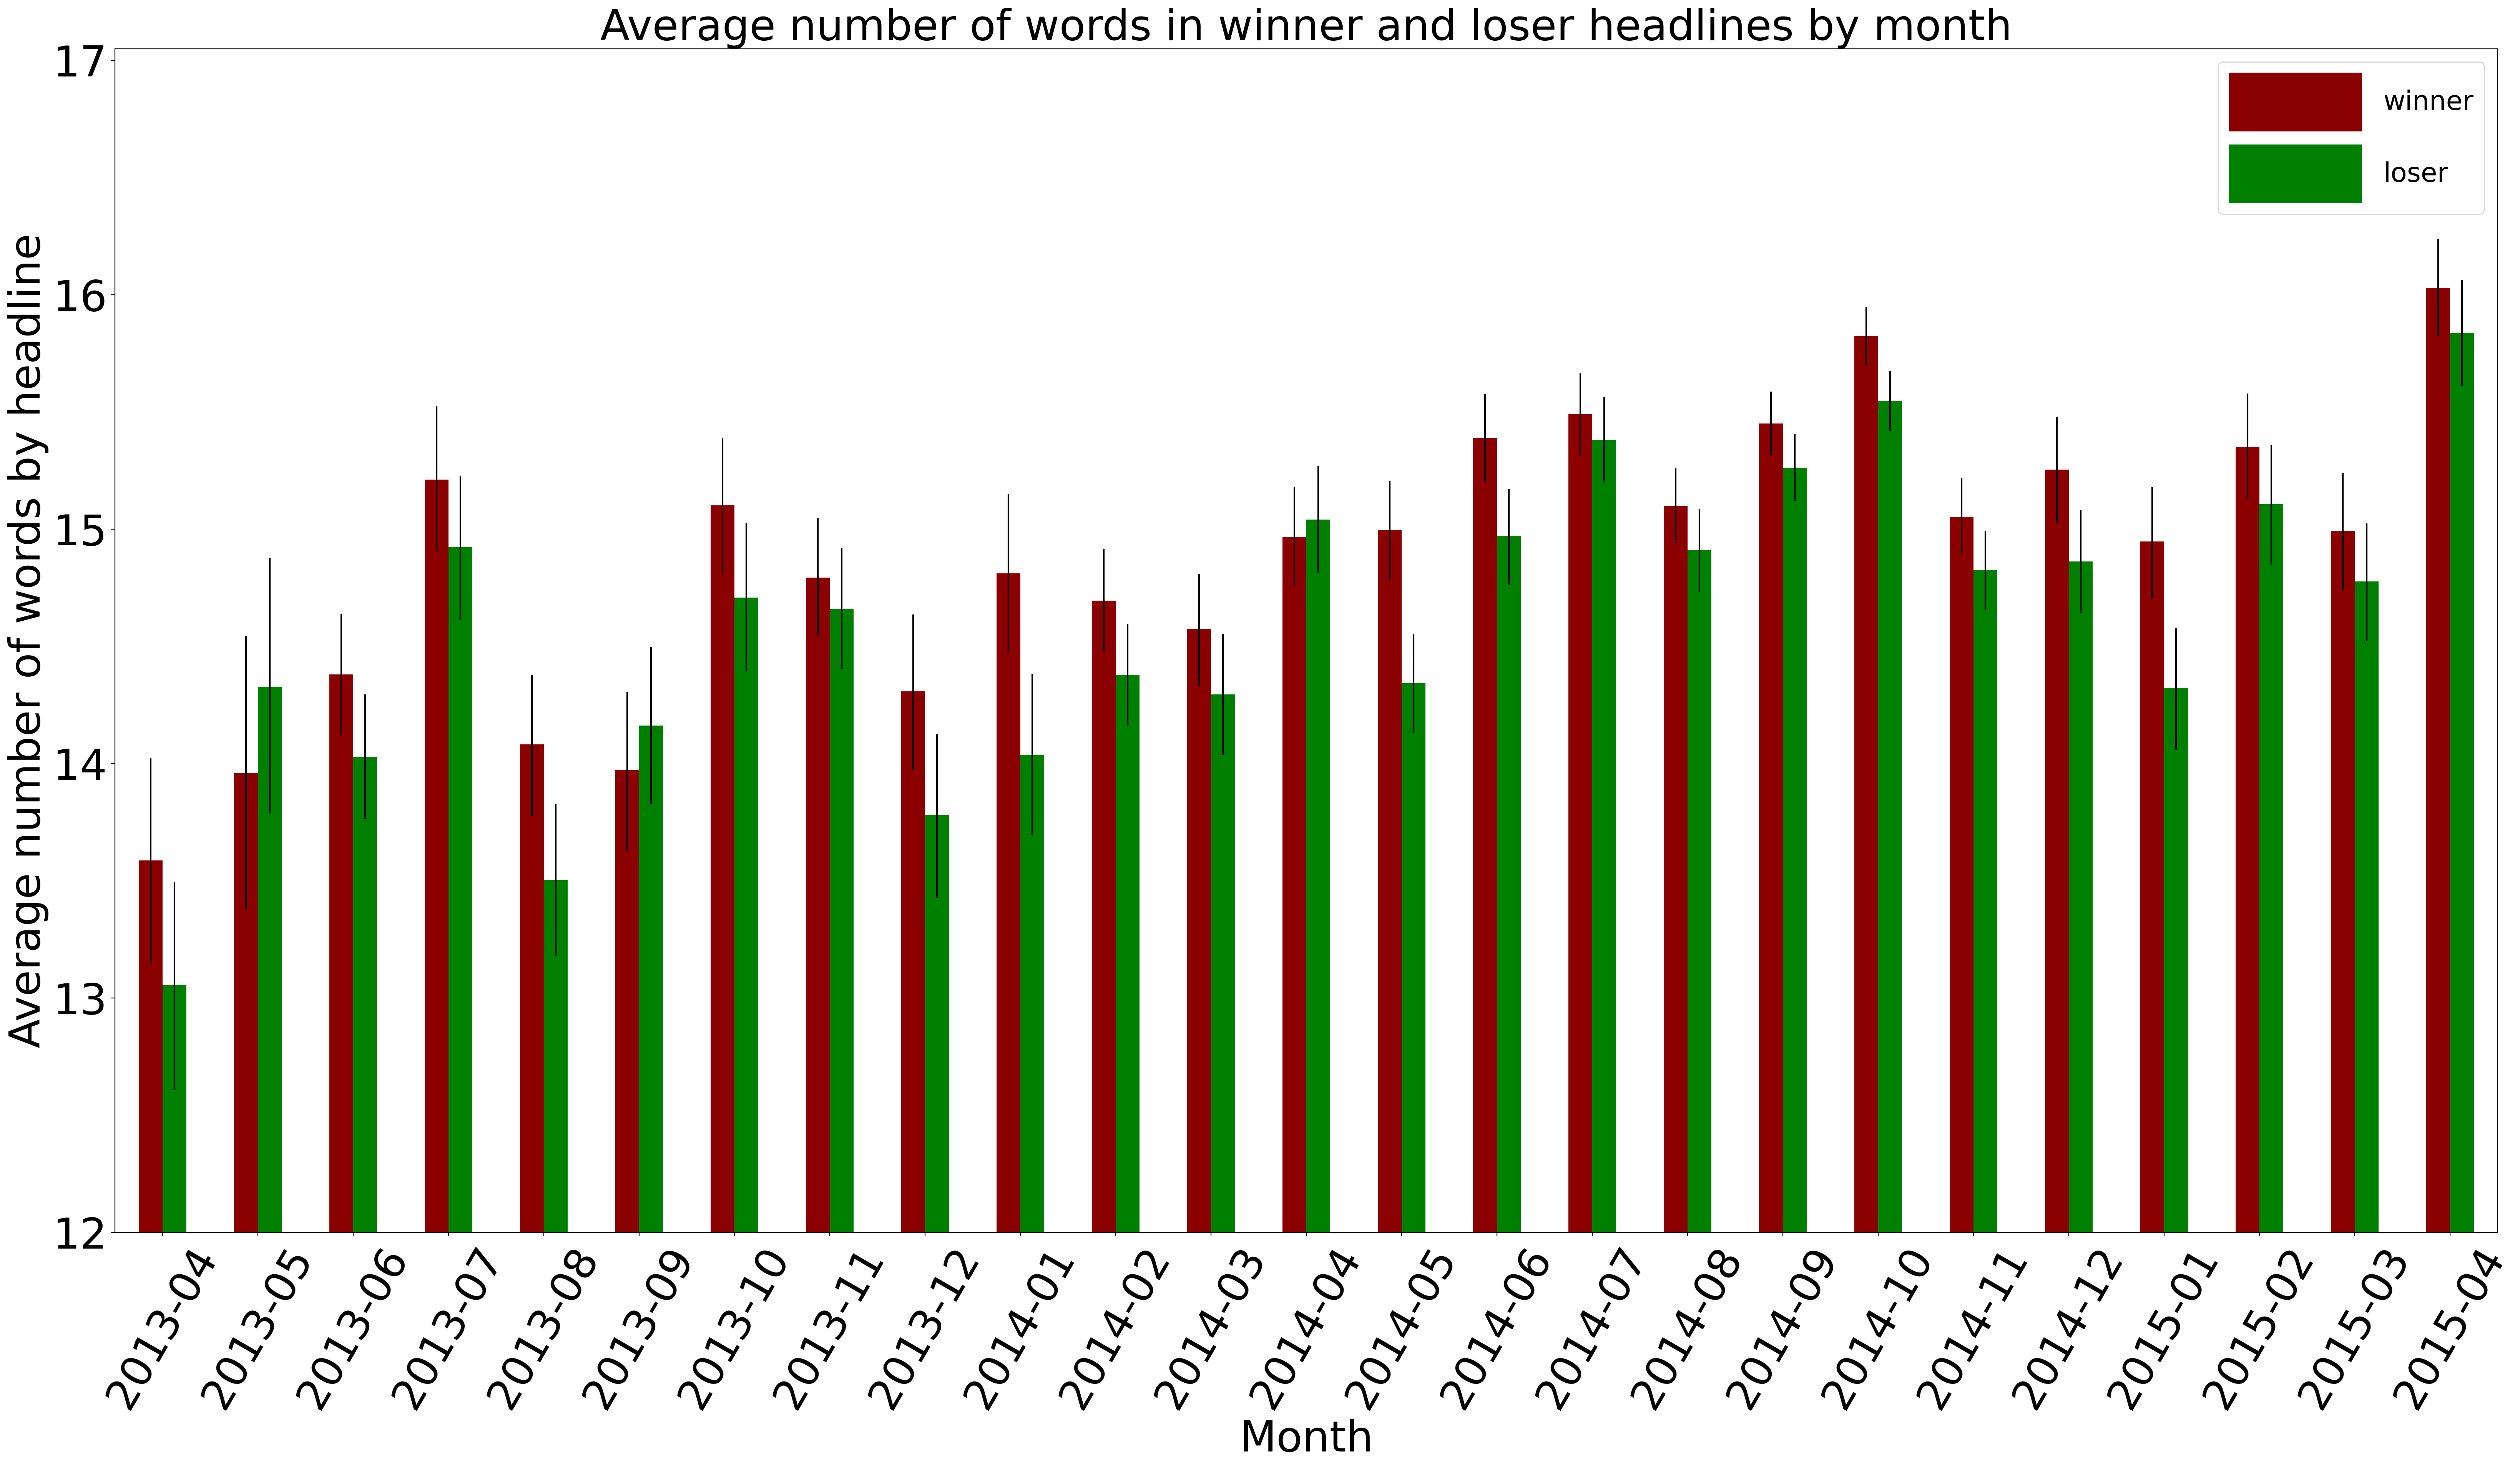

In [46]:
#Setting some plot parameters
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams['figure.dpi'] = 200
plt.rc('legend',fontsize=25)
plt.rc('legend',handlelength=5)
plt.rc('legend',handleheight=3)


average_by_month.reset_index().plot.bar(x='date_created_month',y=['winner','loser']
                        ,color={'winner':'darkred','loser':'green'}
                        ,yerr=[average_by_month[['winner_lower','winner_upper']].T,average_by_month[['loser_lower','loser_upper']].T])
plt.ylabel('Average number of words by headline')
plt.xlabel('Month')
plt.title('Average number of words in winner and loser headlines by month')
#Changing the fontsize
ax=plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
         ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(40)
plt.xticks(rotation=60)
plt.ylim(bottom=12)

labels = [item.get_text()[0:7] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.show()

#resetting the plot rc parameters
plt.rcParams.update(plt.rcParamsDefault)

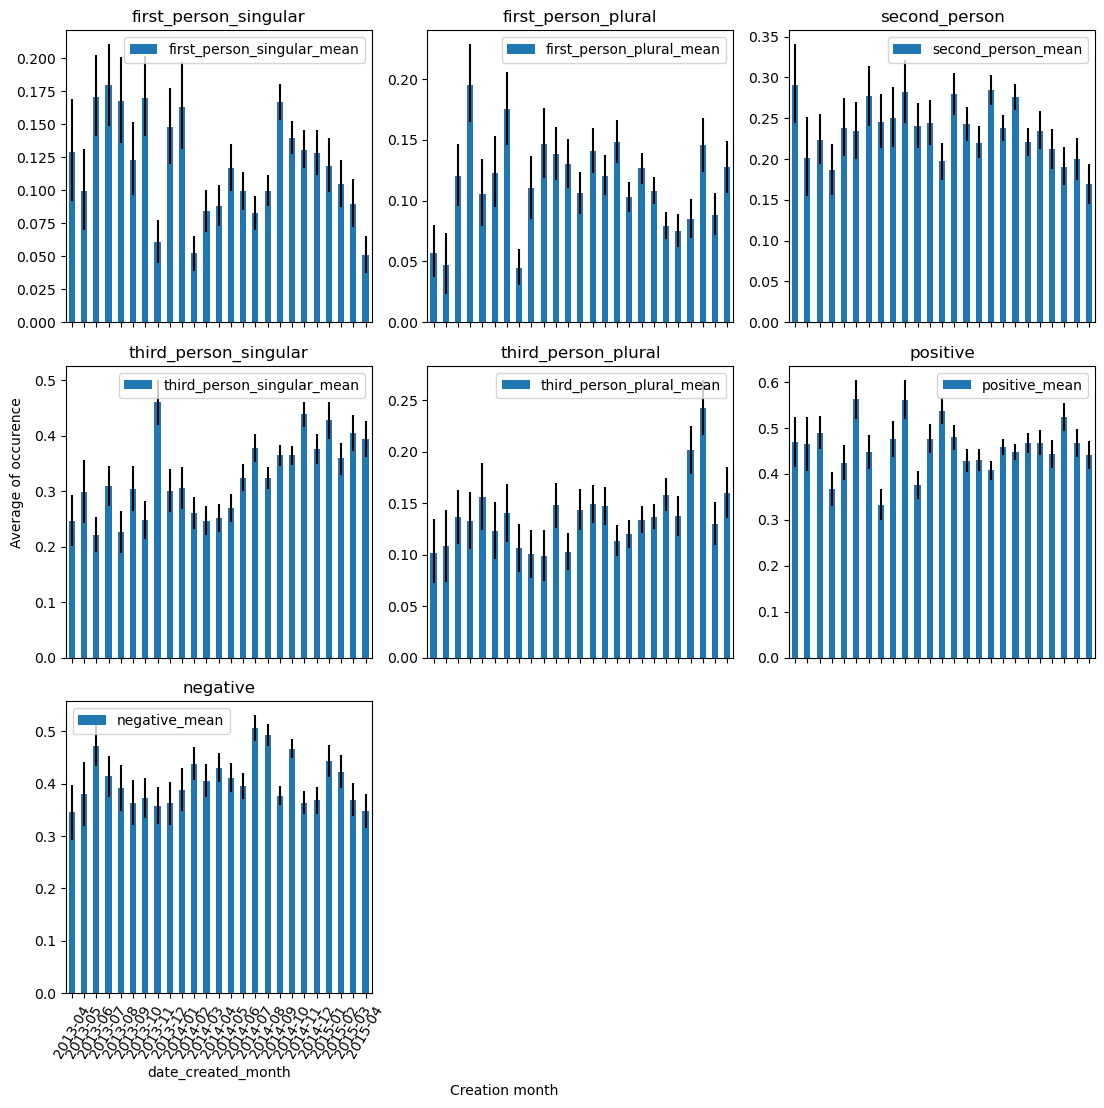

In [47]:
#4.2 
import math #to justify
plt.rcParams.update(plt.rcParamsDefault)
list_pronoun=list(feature_wordsets.keys())+list(sentiment_wordsets.keys())+[]+[]
fig,ax=plt.subplots(3,3,figsize=(11,11),sharex=True,sharey=False)

#takes ~5 minutes to run
for i in range(0,9):
    if i==7 or i==8:
        sbplt = ax[math.floor(i/3),i%3]
        fig.delaxes(sbplt)
    else:
        sbplt = ax[math.floor(i/3),i%3]
        pronoun=list_pronoun[i]
        temp=pairs_april2013.copy()
        temp[pronoun+'_mean']=(temp[pronoun+'1']+temp[pronoun+'2'])/2         
        temp_average_by_month=temp.groupby('date_created_month')[pronoun+'_mean'].mean().to_frame()
        temp_average_by_month[pronoun+'_lower']=temp.groupby('date_created_month').apply(lambda x: bootstrap(x[pronoun+'_mean'],10000)[0])
        temp_average_by_month[pronoun+'_upper']=temp.groupby('date_created_month').apply(lambda x: bootstrap(x[pronoun+'_mean'],10000)[1])
        temp_average_by_month['mean-lower']=temp_average_by_month[pronoun+'_mean']-temp_average_by_month[pronoun+'_lower']
        temp_average_by_month['upper-mean']=temp_average_by_month[pronoun+'_upper']-temp_average_by_month[pronoun+'_mean']
        temp_average_by_month.reset_index().plot.bar(x='date_created_month',y=pronoun+'_mean'
                            ,yerr=[temp_average_by_month['mean-lower'],temp_average_by_month['upper-mean']],ax=sbplt)
        sbplt.set_title(list_pronoun[i])
        labels = [item.get_text()[0:7] for item in sbplt.get_xticklabels()]
        sbplt.set_xticklabels(labels)
        sbplt.set_xticklabels([str(x)[0:7] for x in temp_average_by_month.index.to_list()], rotation = 60)
    
    
fig.tight_layout()
fig.text(0.4,0,"Creation month")
fig.text(0,0.5,"Average of occurence", rotation = 90)
plt.plot()
plt.show()

4.3 ...

In [49]:
4.4 
pairs['created_at']=pd.to_datetime(pairs['date_created'])
t1=datetime(2013,4,1)
t2=datetime(2014,4,1)
pairs_t1=pairs[(pairs["created_at"]>=t1) & (pairs["created_at"]<t2)]
pairs_t2=pairs[pairs["created_at"]>=t2]
pairs_t1

,clickability_test_id,headline1,headline2,ctr1,ctr2,date_created,numwords1,numwords2,first_person_singular1,first_person_singular2,...,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2,positive1,positive2,negative1,negative2,created_at
4406,51637899bf5cd10002006730,"Moms Rock, Here's Proof.",See How Motherhood Is Uniting The World,0.004375,0.004019,2013-04-09 02:19:56.000,4,7,0,0,...,0,0,0,0,0,0,0,0,0,2013-04-09 02:19:56.000
4407,51637899bf5cd10002006730,"Moms Rock, Here's Proof.",This Is Like An International Rock And Roll To...,0.004375,0.003486,2013-04-09 02:19:56.000,4,12,0,0,...,0,0,0,0,0,0,1,0,0,2013-04-09 02:19:56.000
4410,51637899bf5cd10002006730,See How Motherhood Is Uniting The World,This Is Like An International Rock And Roll To...,0.004019,0.003486,2013-04-09 02:13:58.000,7,12,0,0,...,0,0,0,0,0,0,1,0,0,2013-04-09 02:13:58.000
4463,51591f1b19699d000200495f,An Open Letter To Scared Straight People From ...,Watch A Lesbian Stage An Intervention With Str...,0.016568,0.016323,2013-04-01 05:46:19.000,14,9,0,0,...,0,0,0,0,0,0,0,1,0,2013-04-01 05:46:19.000
4464,51591f1b19699d000200495f,An Open Letter To Scared Straight People From ...,An Open Letter From A Badass Lesbian To Some S...,0.016568,0.015488,2013-04-01 05:46:19.000,14,12,0,0,...,0,0,0,0,0,0,0,1,1,2013-04-01 05:46:19.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38745,52e181ae6f036a9c19000003,You Don't Care About Your Privacy And Kim Kard...,A Secret NSA Mind Control Plot Uses Kim Kardas...,0.019675,0.015715,2014-01-23 20:56:29.634,11,17,0,0,...,1,1,0,0,0,1,0,0,1,2014-01-23 20:56:29.634
38746,52e181ae6f036a9c19000003,You Don't Care About Your Privacy And Kim Kard...,Does Watching Big Brother On TV Make You More ...,0.019675,0.008997,2014-01-23 20:56:29.634,11,15,0,0,...,1,1,0,0,0,1,0,0,0,2014-01-23 20:56:29.634
38750,52e181ae6f036a9c19000003,Why Don't We Protest NSA Wiretapping More? His...,Does Watching Big Brother On TV Make You More ...,0.015489,0.008997,2014-01-23 20:57:32.599,16,15,0,0,...,1,1,0,0,0,0,0,1,0,2014-01-23 20:57:32.599
38752,52e181ae6f036a9c19000003,A Secret NSA Mind Control Plot Uses Kim Kardas...,Why Don't We Protest NSA Wiretapping More? His...,0.015715,0.015489,2014-01-23 20:57:10.684,17,16,0,0,...,0,0,1,0,0,0,0,1,1,2014-01-23 20:57:10.684


4.5 Let's test if the values are different for t1 and t2. Assuming equal variances, we do a sample t-test to compare the mean values at t1 and t2.
Let's start with the mean number of words :

In [50]:
nbrwords_t1=np.array([pairs_t1['numwords1'],pairs_t1['numwords2']])
nbrwords_t2=np.array([pairs_t2['numwords1'],pairs_t2['numwords2']])
n1,n2=pairs_t1.shape[0],pairs_t2.shape[0]
ratios_t1=nbrwords_t1[0]/nbrwords_t1[1] #Ratios during period t1
ratios_t2=nbrwords_t2[0]/nbrwords_t2[1] #Ratios during period t2
#ratios_t1=[nbrwords_t1[0][i]/nbrwords_t1[1][i] for i in range(n1)]
#ratios_t2=[nbrwords_t2[0][i]/nbrwords_t2[1][i] for i in range(n1)]
print(np.mean(ratios_t1))
print(np.mean(ratios_t2))

1.067598972691558
1.059506669066516


In [51]:
statistic_ratio, p_val_ratio= stats.ttest_ind(ratios_t1, ratios_t2)
print(f'The statistic for ratio is {statistic_ratio:.2e}')
print(f'The p-value is {p_val_ratio:.2e}')


The statistic for ratio is 1.50e+00
The p-value is 1.33e-01


Now let's study the mean difference in positive headlines :

In [52]:
positive_t1=np.array([pairs_t1['positive1'],pairs_t1['positive2']])
positive_t2=np.array([pairs_t2['positive1'],pairs_t2['positive2']])
diff_positive_t1=positive_t1[0]-positive_t1[1] #Differences of positivity during period t1
diff_positive_t2=positive_t2[0]-positive_t2[1] #Same during period t2
print(np.mean(diff_positive_t1))
print(np.mean(diff_positive_t2))

0.004253509145044662
-0.005158264947245018


In [53]:
statistic_positive, p_val_positive= stats.ttest_ind(diff_positive_t1, diff_positive_t2)
print(f'The statistic for postive headlines is {statistic_positive:.2e}')
print(f'The p-value is {p_val_positive:.2e}')

The statistic for postive headlines is 8.84e-01
The p-value is 3.77e-01


Now the negative headlines :

In [54]:
negative_t1=np.array([pairs_t1['negative1'],pairs_t1['negative2']])
negative_t2=np.array([pairs_t2['negative1'],pairs_t2['negative2']])
diff_negative_t1=negative_t1[0]-negative_t1[1] #Differences of negativity during period t1
diff_negative_t2=negative_t2[0]-negative_t2[1] #Same during period t2
print(np.mean(diff_negative_t1))
print(np.mean(diff_negative_t2))

0.04210974053594215
0.011723329425556858


In [55]:
statistic_negative, p_val_negative= stats.ttest_ind(diff_negative_t1, diff_negative_t2)
print(f'The statistic for negative headlines is {statistic_negative:.2e}')
print(f'The p-value is {p_val_negative:.2e}')

The statistic for negative headlines is 3.04e+00
The p-value is 2.35e-03


In [56]:
for pronoun_type in pronoun_types :
    col1 = pronoun_type + str(1)
    col2 = pronoun_type + str(2)
    curr_pronoun_t1 = np.array([pairs_t1[col1], pairs_t1[col2]])
    curr_pronoun_t2 = np.array([pairs_t2[col1], pairs_t2[col2]])
    diff_curr_pronoun_t1=curr_pronoun_t1[0]-curr_pronoun_t1[1]
    diff_curr_pronoun_t2=curr_pronoun_t2[0]-curr_pronoun_t2[1]
    statistic_pronoun, p_val_pronoun= stats.ttest_ind(diff_curr_pronoun_t1, diff_curr_pronoun_t2)
    print(f'The statistic for {pronoun_type} is {statistic_pronoun:.2e} and the p-value is  {p_val_pronoun:.2e}')

The statistic for first_person_singular is -5.75e-02 and the p-value is  9.54e-01
The statistic for first_person_plural is -3.63e-01 and the p-value is  7.16e-01
The statistic for second_person is 1.74e+00 and the p-value is  8.19e-02
The statistic for third_person_singular is 1.04e+00 and the p-value is  2.97e-01
The statistic for third_person_plural is 2.33e+00 and the p-value is  1.97e-02


We made 8 tests so we must adjust the significance level to $0.05/8=6.25e-03$. The test for negative headlines yields a p-value smaller than this, so we cannot reject the hypothesis that the effects observed are not the same at during time periods $t_1$ and $t_2$.

4.6
This change could be related to many phenomena. We can imagine that negativity is not as sensational as it could seem in the past. In a world knowing a revolution of information, medias have taken a new dimension. Humans are known to react more to negative than positive information (S.Soroka, P.Fournier, L.Nir, "Cross-national evidence of a negativity bias in psychophysiological reactions to news" (2019)). However the huge flow of negativity may be making people used to these reactions.
A second hypotesis even more related to social medias is that people significantly avoid important news as highlighted by Reuters in their annual report (2022). This is likely to be due to a growing lack of trust in the medias from people, fearing fake news and political bias.

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:

    a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
    a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in T4.7? 

In [ ]:
#4.7
pairs_positive=pairs[(pairs['positive1']==1)&(pairs['positive2']==1)]
pairs_negative=pairs[(pairs['negative1']==1)&(pairs['negative2']==1)]

In [ ]:
#4.8 some experimentations:
stats.pearsonr(pairs_positive['ctr1'],pairs_positive['first_person_singular1'])

In [ ]:
pairs_positive.groupby(['first_person_singular1']).mean()['ctr1'].to_frame()

In [ ]:
pairs_positive.groupby(['first_person_singular2']).mean()['ctr2'].to_frame()

In [ ]:
pairs_negative.groupby(['first_person_singular1']).mean()['ctr1'].to_frame()

In [ ]:
pairs_negative.groupby(['first_person_singular2']).mean()['ctr2'].to_frame()

In [ ]:
statistic_ind, p_val_ind = stats.ttest_ind(pairs_positive['first_person_singular1'], pairs_positive['first_person_singular2'])
statistic_pair, p_val_pair = stats.ttest_rel(pairs_positive['first_person_singular1'], pairs_positive['first_person_singular2'])
print(f'The p-values are {p_val_ind:.2e} for the independant sample t-test and {p_val_pair:.2e} for the paired t-test.')

mean_diff = np.mean(pairs_positive['first_person_singular1']-pairs_positive['first_person_singular2'])
print(f'The difference in mean of the variable first_person_singular in winner versus loser headlines is {mean_diff}.')

In [ ]:
statistic_ind, p_val_ind = stats.ttest_ind(pairs_negative['first_person_singular1'], pairs_negative['first_person_singular2'])
statistic_pair, p_val_pair = stats.ttest_rel(pairs_negative['first_person_singular1'], pairs_negative['first_person_singular2'])
print(f'The p-values are {p_val_ind:.2e} for the independant sample t-test and {p_val_pair:.2e} for the paired t-test.')

mean_diff = np.mean(pairs_negative['first_person_singular1']-pairs_negative['first_person_singular2'])
print(f'The difference in mean of the variable first_person_singular in winner versus loser headlines is {mean_diff}.')

In [ ]:
# Use bootstrapping to generate a distribution of mean difference of first person singular pronouns for the two dataframes
# Get from these two distributions the mean and standard deviation, n = n_bootstrap = 10000 for both
n_bootstrap = 10000
fps_ci_pos, fps_mean_pos, fps_std_pos = bootstrapping(np.array([pairs_positive['first_person_singular1'], 
                                                                pairs_positive['first_person_singular2']]), 
                                                                n_bootstrap, 0.95, difference = True)
fps_ci_neg, fps_mean_neg, fps_std_neg = bootstrapping(np.array([pairs_negative['first_person_singular1'], 
                                                    pairs_negative['first_person_singular2']]), n_bootstrap, 0.95, 
                                                    difference = True)

Now we can compute a "simple" confidence interval, using a z-test statistic, using the means, standard deviations and sizes of these distributions, to see if there is a difference. For a confidence interval of 95%, we have that $z_{(1-0.05/2)} = 1.96$, so for two populations x and y,  

$CI =[\bar{x} - \bar{y} ± z_{(1-0.05/2)} \times \sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}]$  

In our example, this gives :

In [ ]:
mean_x = fps_mean_pos
mean_y = fps_mean_neg
std_x = fps_std_pos
std_y = fps_std_neg

lower_bound = mean_x - mean_y - 1.96*np.sqrt(std_x**2/n_bootstrap + std_y**2/n_bootstrap)
upper_bound = mean_x - mean_y + 1.96*np.sqrt(std_x**2/n_bootstrap + std_y**2/n_bootstrap)
print('CI :', [round(lower_bound, 6), round(upper_bound, 6)])

As the 95% confidence interval does not include the value 0, we can say, with 95% confidence, that the effect is heterogenous across headlines with positive or negative words.

Bonus : We can also look at which effect is stronger, using a one sided CI ! The null hypothesis is that the difference in means of the population is smaller than zero. We will use $z_{(1-0.5)} = 1.645$.

$CI =[\bar{x} - \bar{y} - z_{(1-0.05)} \times \sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}, \infty)$  

In [ ]:
mean_x = fps_mean_pos
mean_y = fps_mean_neg
std_x = fps_std_pos
std_y = fps_std_neg

lower_bound = mean_x - mean_y - 1.645*np.sqrt(std_x**2/n_bootstrap + std_y**2/n_bootstrap)
upper_bound = mean_x - mean_y + 1.645*np.sqrt(std_x**2/n_bootstrap + std_y**2/n_bootstrap)
print('CI : [', round(lower_bound, 6), ', infinity )')

We can therefore say, with 95% confidence, that the effect of using first person singular pronouns is stronger for headlines containing positive words. 

### 4.9
Dear Upworthy employees, 

We took a look at your headlines dataset, and came to some interesting conclusions which you could consider to make more stonks.  

We found that, with a certain statistical significance, using... :
- more words
- negative language 
- first and third person singular pronouns  

improves the headlines (see task 3.9), as does avoiding first person plural pronouns. There is however no statistical conclusion that we can make about other pronoun types.  

Be careful however, negative language effect decayed over time between 2013 and 2015 (see 4.6), so make sure to always follow current trends. Please !!!!!!